# Image Classification. Cats vs Dogs

## Part 1
### In the initial phase of the project, I employed traditional machine learning techniques for classification, specifically leveraging the scikit-learn library

In the first part of this project, it is attempted to classify images of dogs and cats using logistic regression and random forest.
Let us see how they perform!

In [1]:
# Importing necessary libraries
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split



In [2]:
#Loading dataset

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

dogs = load_images_from_folder('C:/Users/mikhe/OneDrive/Desktop/Dog')
cats = load_images_from_folder('C:/Users/mikhe/OneDrive/Desktop/Cat')


In [3]:
dogs_labels = [1 for _ in range(len(dogs))]
cats_labels = [0 for _ in range(len(cats))]


#### Next three cells will resize, flatten and normilize images.

__Resizing__ : Resizing images to a consistent size ensures that all input images have the same dimensions.
Fixed-size inputs allow for more efficient processing during training and inference,
as the model's architecture is designed to handle a specific input size.

__Flattening__ : Flattening converts the 2D or 3D image arrays into a 1D vector. This process is necessary when using fully connected layers in neural networks. It simplifies model design, making it easier to connect the output of convolutional layers to fully connected layers.

__Normalizing__ : Normalizing pixel values to a specific range (e.g., [0,1] in our case) helping the model converge faster during training. It prevents one feature (pixel) from dominating others, improving the stability of the optimization process.It also reduces the impact of varying lighting conditions across images, making the model more robust to changes in brightness and contrast.Normalizing images aids in better generalization across diverse datasets by ensuring that the model focuses on learning patterns rather than being sensitive to absolute pixel values.

In [4]:
def resize_images(images, size=(64, 64)):
    return [cv2.resize(image, size) for image in images]

dogs = resize_images(dogs)
cats = resize_images(cats)

In [5]:
def flatten_images(images):
    return [image.flatten() for image in images]

dogs = flatten_images(dogs)
cats = flatten_images(cats)

In [6]:
def normalize_images(images):
    return [image/255 for image in images]

dogs = normalize_images(dogs)
cats = normalize_images(cats)

Cell below divides data into training and testing sets, random state is set, so the code is reproducable and consistent for 
each run and does not produce different results

In [7]:
X = np.array(dogs + cats)
y = np.array(dogs_labels + cats_labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter = 1000)
logistic_model.fit(X_train,y_train)

C:\Users\mikhe\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

As seen from the warning, model could not converge, so we expect poor results,
even though we incerased number of max iterations

So, let us see how this model performed

In [8]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score

In [15]:
Y_predicted = logistic_model.predict(X_train)

In [21]:
accuracy_logistic = accuracy_score(Y_predicted,y_train)
precision_logistic = precision_score(Y_predicted,y_train)
recall_logistic = recall_score(Y_predicted,y_train)
f1_logistic = f1_score(Y_predicted,y_train)
print(f'Accuracy: {accuracy_logistic}')
print(f'Precision: {precision_logistic}')
print(f'Recall: {recall_logistic}')
print(f'F1-score: {f1_logistic}')

Accuracy: 0.8305067737079779
Precision: 0.8243120653159963
Recall: 0.8333842861510241
F1-score: 0.8288233505624809




As we see from the results, model performance is not so poor on the training set

Now, let us see how it performs on the test set


In [22]:
Y_predicted_test = logistic_model.predict(X_test)

In [23]:
accuracy_logistic = accuracy_score(Y_predicted_test,y_test)
precision_logistic = precision_score(Y_predicted_test,y_test)
recall_logistic = recall_score(Y_predicted_test,y_test)
f1_logistic = f1_score(Y_predicted_test,y_test)
print(f'Accuracy: {accuracy_logistic}')
print(f'Precision: {precision_logistic}')
print(f'Recall: {recall_logistic}')
print(f'F1-score: {f1_logistic}')

Accuracy: 0.5695364238410596
Precision: 0.5513277843836702
Recall: 0.5786189683860233
F1-score: 0.5646437994722956


#### As we see, logistic regression model performed very poorly on the test set, berely above the random guessing,
#### so it is not suitable for this classification task.

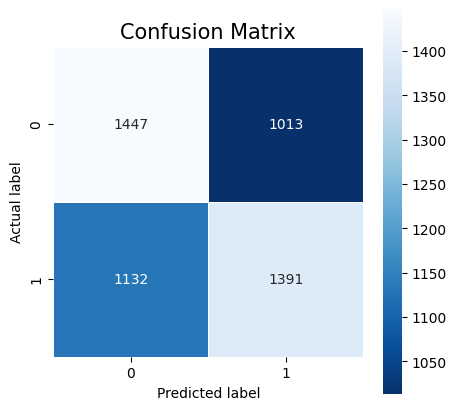

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, Y_predicted_test)

# Visualize confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

As seen from the confusion matrix above which was made based on model's performance on the test set,
results are very close to each other for each cell, indicated that model's performance is magrinally better than 
the random guessing

##### Now let us try random forest classifier and see how it performs on our dataset

In [29]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
Y_predicted_forest = random_forest_model.predict(X_train)


accuracy_forest = accuracy_score(Y_predicted_forest,y_train)
precision_forest = precision_score(Y_predicted_forest,y_train)
recall_forest = recall_score(Y_predicted_forest,y_train)
f1_forest = f1_score(Y_predicted_forest,y_train)
print(f'Accuracy: {accuracy_forest}')
print(f'Precision: {precision_forest}')
print(f'Recall: {recall_forest}')
print(f'F1-score: {f1_forest}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


The default random forest classifier, without hyperparameter tuning, perfectly fits the training set,
potentially suggesting overfitting and high variance, which may lead to suboptimal performance on the test set.
Let us see how it performs on the test set:

In [31]:
Y_test_forest = random_forest_model.predict(X_test)


accuracy_forest = accuracy_score(Y_test_forest,y_test)
precision_forest = precision_score(Y_test_forest,y_test)
recall_forest = recall_score(Y_test_forest,y_test)
f1_forest = f1_score(Y_test_forest,y_test)
print(f'Accuracy: {accuracy_forest}')
print(f'Precision: {precision_forest}')
print(f'Recall: {recall_forest}')
print(f'F1-score: {f1_forest}')

Accuracy: 0.6431868352398153
Precision: 0.5866032500990884
Recall: 0.6681715575620768
F1-score: 0.6247361756015196


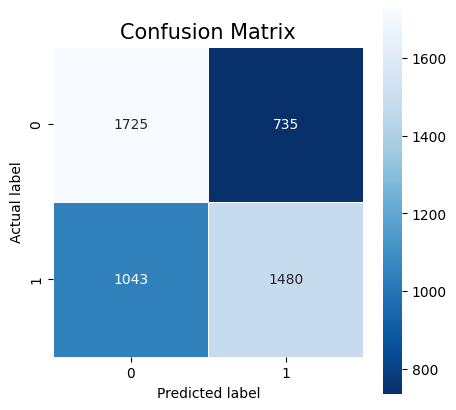

In [36]:
cm_forest = confusion_matrix(y_test, Y_test_forest)

# Visualize confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_forest, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

## Part 2 
### In the subsequent phase of the project, we will explore the application of deep learning techniques for image classification.

In [9]:
# I will use keras library for this purpose

from keras.preprocessing.image import ImageDataGenerator

# Define data generators for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescaling pixel values to [0, 1]
validation_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255) 

# Load and augment training images from the specified directory
train_generator = train_datagen.flow_from_directory(
    'C:/Users/mikhe/OneDrive/Desktop/data/train',
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=20,  # Batch size for training
    class_mode='binary'  # Binary classification for cat vs. dog
)

# Load validation images from the specified directory
validation_generator = validation_datagen.flow_from_directory(
    'C:/Users/mikhe/OneDrive/Desktop/data/validation',
    target_size=(150, 150),  
    batch_size=20, 
    class_mode='binary' 
)

# Load test images from the specified directory
test_generator = test_datagen.flow_from_directory(
    'C:/Users/mikhe/OneDrive/Desktop/data/test',
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary' 
)


Found 19819 images belonging to 2 classes.
Found 3390 images belonging to 2 classes.
Found 1750 images belonging to 2 classes.


#### Building neural network

One common approach to classify images using deep learning is to use a Convolutional Neural Network (CNN), a type of deep learning model that’s particularly good at processing images.
However, training a CNN from scratch requires a lot of data and computational resources, and it might not always be feasible, so I will use pre-trained model. These are models that have already been trained on large datasets and have learned to extract useful features from images. By using a pre-trained model, we can leverage the knowledge it has already gained, and adapt it to our specific task. This is a process known as transfer learning.

In this case, we’re using the VGG16 model, which has been pre-trained on the ImageNet dataset. We load the model, but exclude its top layers because those are the ones most specific to the task it was originally trained on (i.e., classifying images into 1000 categories). Instead, we’re going to add our own top layers that are more suited to our binary classification problem.

We start by freezing the base model layers. This means their weights will not be updated during training, and we’ll keep the features they’ve already learned.

Next, we add our own layers:

A Flatten layer to convert the feature maps from the base model into a 1D array.
A Dense layer with 1024 units and ReLU activation function for our hidden layer.
A Dropout layer for regularization, to prevent overfitting.
Another Dense layer with 1 unit and a sigmoid activation function for our output layer, perfect for a binary classification problem.
We then compile our model with the RMSprop optimizer and binary cross-entropy loss function, suitable for binary classification. We also choose to monitor accuracy during training.

Finally, we fit our model to our data, using a certain number of steps per epoch.

By using this approach, we’re hoping to create a model that can accurately classify images as dogs or cats, even if we don’t have a huge amount of labeled data or the resources to train a complex model from scratch.

In [16]:
from keras.applications import VGG16
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

# Load the VGG model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Create your own model 
model = models.Sequential()
model.add(base_model)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# Set steps per epoch
steps_per_epoch = 200

# Now fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)


Epoch 1/10
200/200 [==============================] - 293s 1s/step - loss: 0.3907 - accuracy: 0.8215 - val_loss: 0.2454 - val_accuracy: 0.8910
Epoch 2/10
200/200 [==============================] - 308s 2s/step - loss: 0.3130 - accuracy: 0.8630 - val_loss: 0.2733 - val_accuracy: 0.8820
Epoch 3/10
200/200 [==============================] - 310s 2s/step - loss: 0.2584 - accuracy: 0.8940 - val_loss: 0.3248 - val_accuracy: 0.8710
Epoch 4/10
200/200 [==============================] - 316s 2s/step - loss: 0.2729 - accuracy: 0.8878 - val_loss: 0.2097 - val_accuracy: 0.9010
Epoch 5/10
200/200 [==============================] - 312s 2s/step - loss: 0.2361 - accuracy: 0.8980 - val_loss: 0.2213 - val_accuracy: 0.9040
Epoch 6/10
200/200 [==============================] - 314s 2s/step - loss: 0.2342 - accuracy: 0.9005 - val_loss: 0.2162 - val_accuracy: 0.9190
Epoch 7/10
200/200 [==============================] - 313s 2s/step - loss: 0.2230 - accuracy: 0.9115 - val_loss: 0.2207 - val_accuracy: 0.9040

In [18]:
# Save the model
model.save('cats_vs_dogs.keras')


In [27]:
# Model performance on the train data
train_loss, train_acc = model.evaluate(train_generator)

print('Train accuracy:', train_acc)


361/991 [=========>....................] - ETA: 17:07 - loss: 0.1988 - accuracy: 0.9180

C:\Users\mikhe\anaconda3\envs\notebook\Lib\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))


991/991 [==============================] - 1764s 2s/step - loss: 0.1971 - accuracy: 0.9181
Test accuracy: 0.918058454990387


__note__ : there is a typo in output above, it should be "Train accuracy: 0.918058454990387", __not__ "Test accuracy: 0.918058454990387". 
To save time and resources I did not run the notebook again.

In [19]:
# Model performance on the test data
test_loss, test_acc = model.evaluate(test_generator)

print('Test accuracy:', test_acc)


88/88 [==============================] - 95s 1s/step - loss: 0.2326 - accuracy: 0.9097
Test accuracy: 0.9097142815589905


In [21]:
# Model performance on the validation data
valid_loss, valid_acc = model.evaluate(validation_generator)

print('Validation accuracy:', valid_acc)


170/170 [==============================] - 231s 1s/step - loss: 0.2309 - accuracy: 0.9050
Validation accuracy: 0.9050147533416748


As we see, train accuracy is 91.8% . 
This result is much better than the results we got using 

Validation and test accuracies are 90.5% and 90.97%, respectively, also a huge improvement.
Accuracy values for training and test sets are close, thus we have low variance, but bias remains high.

##### Visualize loss and accuracy

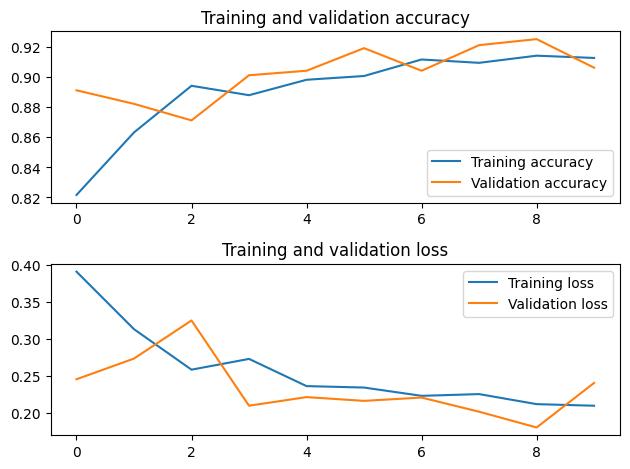

In [26]:
import matplotlib.pyplot as plt

# Retrieve a list of accuracy results on training and validation data sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Create two subplots
fig, axs = plt.subplots(2)

# Plot training and validation accuracy per epoch
axs[0].plot(epochs, acc, label='Training accuracy')
axs[0].plot(epochs, val_acc, label='Validation accuracy')
axs[0].set_title('Training and validation accuracy')
axs[0].legend()

# Plot training and validation loss per epoch
axs[1].plot(epochs, loss, label='Training loss')
axs[1].plot(epochs, val_loss, label='Validation loss')
axs[1].set_title('Training and validation loss')
axs[1].legend()

plt.tight_layout()


We note that both, training accuracy and training loss steadily goes down after each epoch, but validation loss and accuracy
is much more volatile (but still goes down as number of epochs increase). Based on those graphs and accuracy values observed above 
we can conclude that our model underfits data, it is too simple, does not capture all the relevant patterns in the training data, leading to poor performance on both the training and validation/test sets.


## Conclusion

This project explored the application of various machine learning models, including Logistic Regression, Random Forest, and a pre-trained Convolutional Neural Network (CNN) model, VGG16, for the task of image classification on a dataset of cat and dog images.

- **Logistic Regression**: This model, while simple and fast, struggled with the high dimensionality and complexity inherent in image data. Each pixel in an image can be considered a separate feature, leading to thousands of features even for relatively small images. As a linear model, Logistic Regression may struggle to find a suitable decision boundary in such a high-dimensional space. While it serves as a good baseline for many binary classification tasks, this project underscores the importance of model selection in relation to data complexity.

- **Random Forest**: The default Random Forest model severely overfitted the data. To mitigate this, hyperparameters such as `n_estimators` (the number of trees in the forest), `max_depth` (the maximum depth of the tree), `min_samples_split` (the minimum number of samples required to split an internal node), and `min_samples_leaf` (the minimum number of samples required to be at a leaf node) could be tuned. Techniques like Grid Search or Random Search can be employed to find the optimal values for these hyperparameters.

- **VGG16**: The pre-trained CNN model, VGG16, performed the best among the three models. However, it still underfitted the data, indicating the model's simplicity. Potential solutions include increasing model complexity and unfreezing some layers of the VGG16 model. Currently, all the layers in the VGG16 model are frozen, meaning their weights are not updated during training. Unfreezing the last few layers of the VGG16 model would allow these layers to update during training, potentially improving the model’s performance.

In conclusion, this project demonstrates the importance of understanding the characteristics of the data and choosing an appropriate model accordingly. It also highlights the need for proper model tuning to prevent overfitting or underfitting.

Thank you for following along with this project!
